# Test del Módulo de Extracción de Datos

Este notebook prueba el módulo `data` que extrae información financiera usando yfinance.

In [ ]:
import sys
from pathlib import Path

# Añadir src al path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

from src.data import DataProvider, get_data
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from IPython.display import display, HTML

## 1. Inicialización del Proveedor

In [8]:
provider = DataProvider()
print(f"Cache directory: {provider.cache_dir}")

Cache directory: C:\Users\Pc\Sistema-De-Analisis-Financiero\data\raw


## 2. Obtener Datos de Precios

In [ ]:
symbol = "AAPL"
price_data = provider.get_price_data(symbol, period="1y", interval="1d")

print(f"\nDatos de precios para {symbol}:")
print(f"Shape: {price_data.shape}")
print(f"\nColumnas: {list(price_data.columns)}")

# Mostrar tabla con datos de precios
print(f"\n--- Tabla de Datos de Precios (Últimos 10 días) ---")
display(price_data.tail(10).style.format({
    'Open': '{:.2f}',
    'High': '{:.2f}',
    'Low': '{:.2f}',
    'Close': '{:.2f}',
    'Volume': '{:,.0f}',
    'Dividends': '{:.2f}',
    'Stock splits': '{:.2f}'
}).background_gradient(subset=['Close'], cmap='RdYlGn'))

INFO:src.data.data:Descargando datos de precios para AAPL...
INFO:src.data.data:Datos guardados en cache: AAPL_price_1y_1d.pkl



Datos de precios para AAPL:
Shape: (251, 7)

Columnas: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock splits']

Primeras filas:
                                 Open        High         Low       Close  \
Date                                                                        
2025-01-14 00:00:00-05:00  233.693058  235.056885  231.423325  232.229675   
2025-01-15 00:00:00-05:00  233.583543  237.884100  233.374482  236.798996   
2025-01-16 00:00:00-05:00  236.281370  236.938386  227.003324  227.232285   
2025-01-17 00:00:00-05:00  231.074899  231.244131  227.451288  228.944534   
2025-01-21 00:00:00-05:00  222.991466  223.409573  218.392272  221.637589   

                             Volume  Dividends  Stock splits  
Date                                                          
2025-01-14 00:00:00-05:00  39435300        0.0           0.0  
2025-01-15 00:00:00-05:00  39832000        0.0           0.0  
2025-01-16 00:00:00-05:00  71759100        0.0           0.0  


## 3. Visualización de Precios

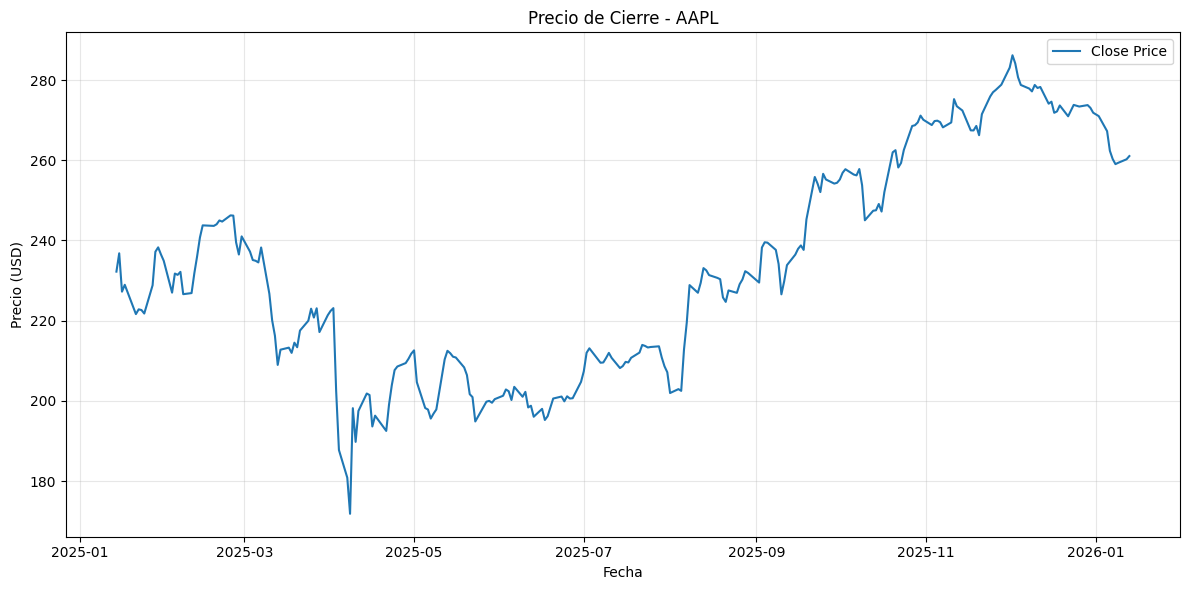

In [ ]:
# Preparar datos para mplfinance
# mplfinance espera columnas en minúsculas y un índice datetime
ohlc_data = price_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
ohlc_data.columns = ['open', 'high', 'low', 'close', 'volume']

# Crear gráfico de velas japonesas
mpf.plot(
    ohlc_data,
    type='candle',
    style='yahoo',
    volume=True,
    title=f'{symbol} - Gráfico de Velas Japonesas',
    ylabel='Precio (USD)',
    ylabel_lower='Volumen',
    figsize=(14, 8),
    show_nontrading=False,
    tight_layout=True,
    returnfig=False
)

## 4. Obtener Datos Fundamentales

In [ ]:
fundamental = provider.get_fundamental_data(symbol)

# Crear tablas organizadas por categorías
print(f"\n{'='*60}")
print(f"DATOS FUNDAMENTALES - {fundamental.get('name', symbol)}")
print(f"{'='*60}\n")

# Tabla 1: Información General
general_data = {
    'Métrica': ['Nombre', 'Sector', 'Industria'],
    'Valor': [
        fundamental.get('name', 'N/A'),
        fundamental.get('sector', 'N/A'),
        fundamental.get('industry', 'N/A')
    ]
}
df_general = pd.DataFrame(general_data)
print("--- INFORMACIÓN GENERAL ---")
display(df_general.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).hide(axis='index'))

# Tabla 2: Valoración
valuation_data = {
    'Métrica': [
        'Market Cap',
        'Enterprise Value',
        'PE Ratio',
        'Forward PE',
        'PEG Ratio',
        'Price to Book',
        'Price to Sales',
        'Dividend Yield',
        'Payout Ratio'
    ],
    'Valor': [
        f"${fundamental.get('market_cap', 0):,.0f}" if fundamental.get('market_cap') else 'N/A',
        f"${fundamental.get('enterprise_value', 0):,.0f}" if fundamental.get('enterprise_value') else 'N/A',
        f"{fundamental.get('pe_ratio', 0):.2f}" if fundamental.get('pe_ratio') else 'N/A',
        f"{fundamental.get('forward_pe', 0):.2f}" if fundamental.get('forward_pe') else 'N/A',
        f"{fundamental.get('peg_ratio', 0):.2f}" if fundamental.get('peg_ratio') else 'N/A',
        f"{fundamental.get('price_to_book', 0):.2f}" if fundamental.get('price_to_book') else 'N/A',
        f"{fundamental.get('price_to_sales', 0):.2f}" if fundamental.get('price_to_sales') else 'N/A',
        f"{fundamental.get('dividend_yield', 0)*100:.2f}%" if fundamental.get('dividend_yield') else 'N/A',
        f"{fundamental.get('payout_ratio', 0)*100:.2f}%" if fundamental.get('payout_ratio') else 'N/A'
    ]
}
df_valuation = pd.DataFrame(valuation_data)
print("\n--- VALORACIÓN ---")
display(df_valuation.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#70AD47'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).hide(axis='index'))

# Tabla 3: Rentabilidad
profitability_data = {
    'Métrica': [
        'ROE (Return on Equity)',
        'ROA (Return on Assets)',
        'Profit Margin',
        'Operating Margin'
    ],
    'Valor': [
        f"{fundamental.get('roe', 0)*100:.2f}%" if fundamental.get('roe') else 'N/A',
        f"{fundamental.get('roa', 0)*100:.2f}%" if fundamental.get('roa') else 'N/A',
        f"{fundamental.get('profit_margin', 0)*100:.2f}%" if fundamental.get('profit_margin') else 'N/A',
        f"{fundamental.get('operating_margin', 0)*100:.2f}%" if fundamental.get('operating_margin') else 'N/A'
    ]
}
df_profitability = pd.DataFrame(profitability_data)
print("\n--- RENTABILIDAD ---")
display(df_profitability.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#FFC000'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).hide(axis='index'))

# Tabla 4: Crecimiento
growth_data = {
    'Métrica': [
        'Revenue Growth',
        'Earnings Growth'
    ],
    'Valor': [
        f"{fundamental.get('revenue_growth', 0)*100:.2f}%" if fundamental.get('revenue_growth') else 'N/A',
        f"{fundamental.get('earnings_growth', 0)*100:.2f}%" if fundamental.get('earnings_growth') else 'N/A'
    ]
}
df_growth = pd.DataFrame(growth_data)
print("\n--- CRECIMIENTO ---")
display(df_growth.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#7030A0'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).hide(axis='index'))

# Tabla 5: Salud Financiera
health_data = {
    'Métrica': [
        'Debt to Equity',
        'Current Ratio',
        'Quick Ratio',
        'Beta'
    ],
    'Valor': [
        f"{fundamental.get('debt_to_equity', 0):.2f}" if fundamental.get('debt_to_equity') else 'N/A',
        f"{fundamental.get('current_ratio', 0):.2f}" if fundamental.get('current_ratio') else 'N/A',
        f"{fundamental.get('quick_ratio', 0):.2f}" if fundamental.get('quick_ratio') else 'N/A',
        f"{fundamental.get('beta', 0):.2f}" if fundamental.get('beta') else 'N/A'
    ]
}
df_health = pd.DataFrame(health_data)
print("\n--- SALUD FINANCIERA ---")
display(df_health.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#C00000'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).hide(axis='index'))

# Tabla 6: Precios y Recomendaciones
price_data_table = {
    'Métrica': [
        'Precio Actual',
        '52 Week High',
        '52 Week Low',
        'Target Price',
        'Recomendación',
        'Número de Analistas'
    ],
    'Valor': [
        f"${fundamental.get('current_price', 0):.2f}" if fundamental.get('current_price') else 'N/A',
        f"${fundamental.get('52_week_high', 0):.2f}" if fundamental.get('52_week_high') else 'N/A',
        f"${fundamental.get('52_week_low', 0):.2f}" if fundamental.get('52_week_low') else 'N/A',
        f"${fundamental.get('target_price', 0):.2f}" if fundamental.get('target_price') else 'N/A',
        fundamental.get('recommendation', 'N/A'),
        f"{fundamental.get('number_of_analysts', 0)}" if fundamental.get('number_of_analysts') else 'N/A'
    ]
}
df_price = pd.DataFrame(price_data_table)
print("\n--- PRECIOS Y RECOMENDACIONES ---")
display(df_price.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#0070C0'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).hide(axis='index'))

INFO:src.data.data:Descargando datos fundamentales para AAPL...
INFO:src.data.data:Datos guardados en cache: AAPL_fundamental.pkl



Datos fundamentales para AAPL:

Nombre: Apple Inc.
Sector: Technology
Industria: Consumer Electronics

--- Valoración ---
Market Cap: 3,857,366,646,784
PE Ratio: 34.946453
Price to Book: 52.304142

--- Rentabilidad ---
ROE: 1.7142199
ROA: 0.22964
Profit Margin: 0.26915002

--- Crecimiento ---
Revenue Growth: 0.079
Earnings Growth: 0.912
